# K-MEANS CLUSTERING

### THE SPARKS FOUNDATION

BY ROHIT SHARMA

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
iris=pd.read_csv('D:Downloads/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris.drop("Id",axis=1,inplace=True)

In [10]:
print(" The number of coulumns in given dataset is: ",iris.shape[1])
print("The target variable is Species:", iris.Species.unique())


 The number of coulumns in given dataset is:  5
The target variable is Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


The percentage of Iris-setosa is: 33.33333333333333
The percentage of Iris-versicolor is: 33.33333333333333
The percentage of Iris-virginica is: 33.33333333333333


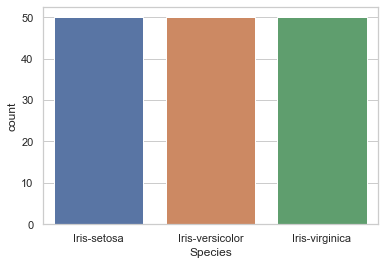

In [11]:
sns.set(style="whitegrid")
sns.countplot(iris.Species)
print("The percentage of Iris-setosa is:",(len(iris[iris["Species"]=="Iris-setosa"])/150)*100)
print("The percentage of Iris-versicolor is:",(len(iris[iris["Species"]=="Iris-versicolor"])/150)*100)
print("The percentage of Iris-virginica is:",(len(iris[iris["Species"]=="Iris-virginica"])/150)*100)

Text(0, 0.5, 'Count')

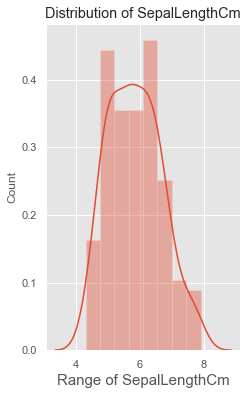

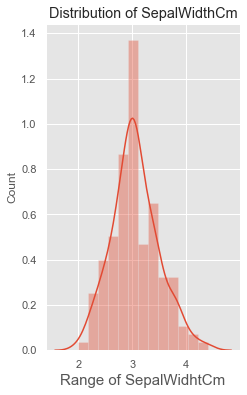

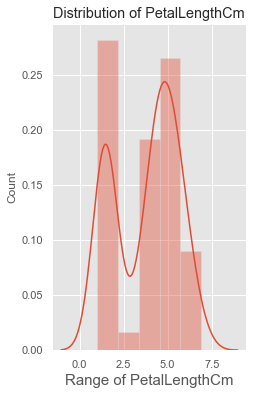

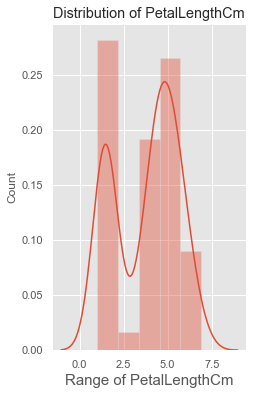

In [12]:
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.subplot(1,4,1)
sns.distplot(iris["SepalLengthCm"])
plt.title("Distribution of SepalLengthCm")
plt.xlabel("Range of SepalLengthCm",fontsize=15)
plt.ylabel("Count")

plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.subplot(1,4,2)
sns.distplot(iris["SepalWidthCm"])
plt.title("Distribution of SepalWidthCm")
plt.xlabel("Range of SepalWidhtCm",fontsize=15)
plt.ylabel("Count")

plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.subplot(1,4,3)
sns.distplot(iris["PetalLengthCm"])
plt.title("Distribution of PetalLengthCm")
plt.xlabel("Range of PetalLengthCm",fontsize=15)
plt.ylabel("Count")

plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.subplot(1,4,4)
sns.distplot(iris["PetalLengthCm"])
plt.title("Distribution of PetalLengthCm")
plt.xlabel("Range of PetalLengthCm",fontsize=15)
plt.ylabel("Count")

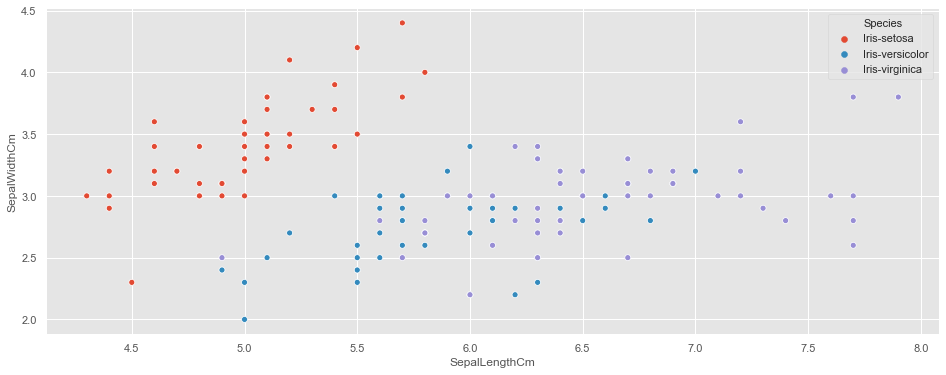

In [13]:
plt.figure(figsize=(16,6))
sns.scatterplot(iris['SepalLengthCm'],iris['SepalWidthCm'],hue=iris['Species'])

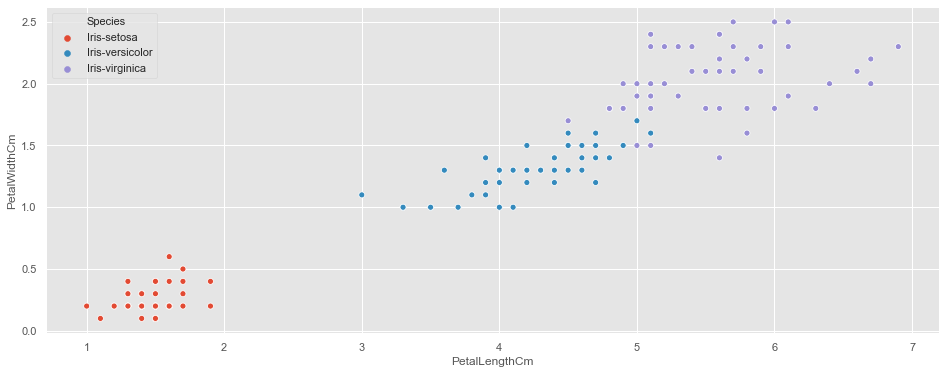

In [14]:
plt.figure(figsize=(16,6))
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'],hue=iris['Species'])

In [19]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
wcss=[]
from sklearn.cluster import KMeans
for i in range (1,15):
    kmean=KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(X)
    wcss.append(kmean.inertia_)

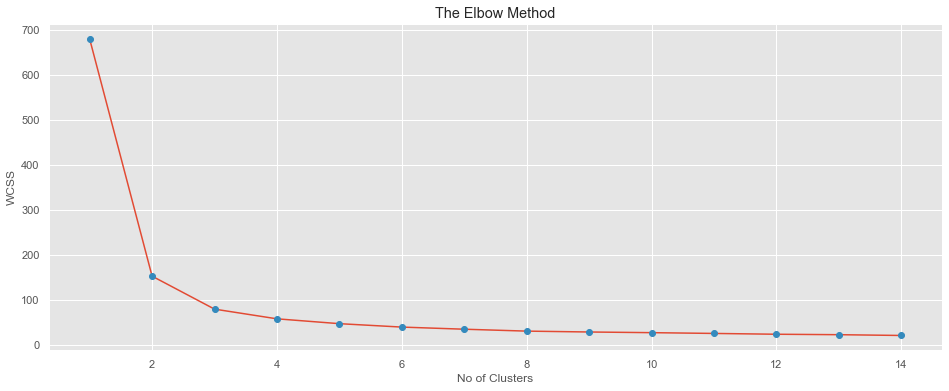

In [21]:
plt.figure(figsize=(16,6))
plt.plot(range(1,15),wcss)
plt.plot(np.arange(1,15),wcss,"o")
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
iris["cluster"]=y_predict

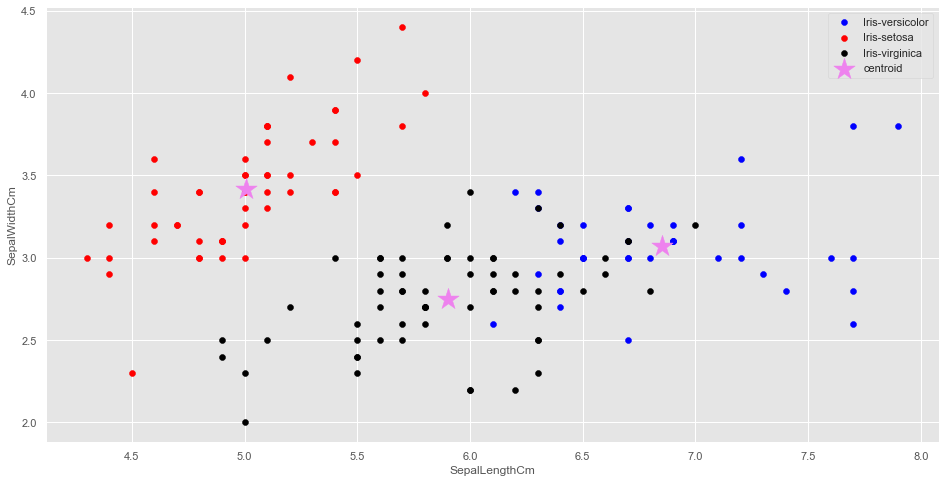

In [29]:
dp=iris[iris.cluster==0]
dp1=iris[iris.cluster==1]
dp2=iris[iris.cluster==2]

plt.figure(figsize=(16,8))
plt.scatter(dp["SepalLengthCm"],dp["SepalWidthCm"],color="blue",label="Iris-versicolor")
plt.scatter(dp1["SepalLengthCm"],dp1["SepalWidthCm"],color="red",label="Iris-setosa")
plt.scatter(dp2["SepalLengthCm"],dp2["SepalWidthCm"],color="black",label="Iris-virginica")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=500,color="violet",marker="*",label="centroid")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

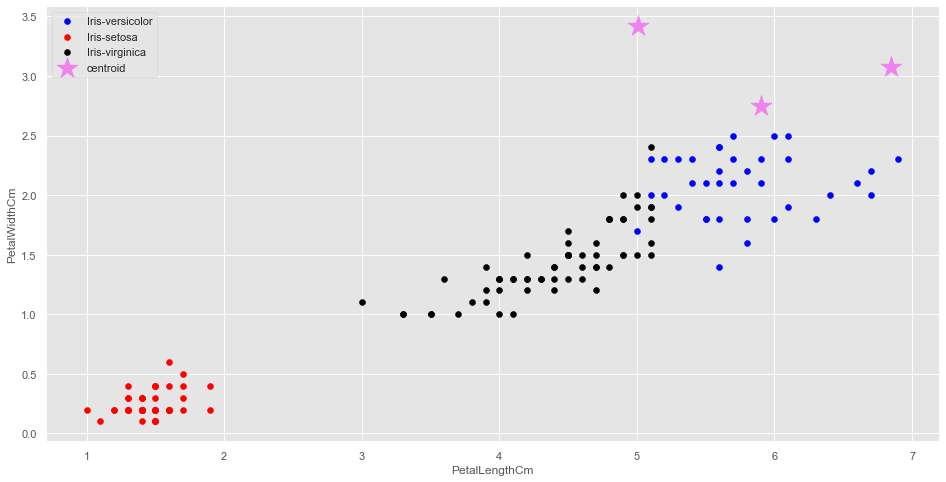

In [30]:

plt.figure(figsize=(16,8))
plt.scatter(dp["PetalLengthCm"],dp["PetalWidthCm"],color="blue",label="Iris-versicolor")
plt.scatter(dp1["PetalLengthCm"],dp1["PetalWidthCm"],color="red",label="Iris-setosa")
plt.scatter(dp2["PetalLengthCm"],dp2["PetalWidthCm"],color="black",label="Iris-virginica")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=500,color="violet",marker="*",label="centroid")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

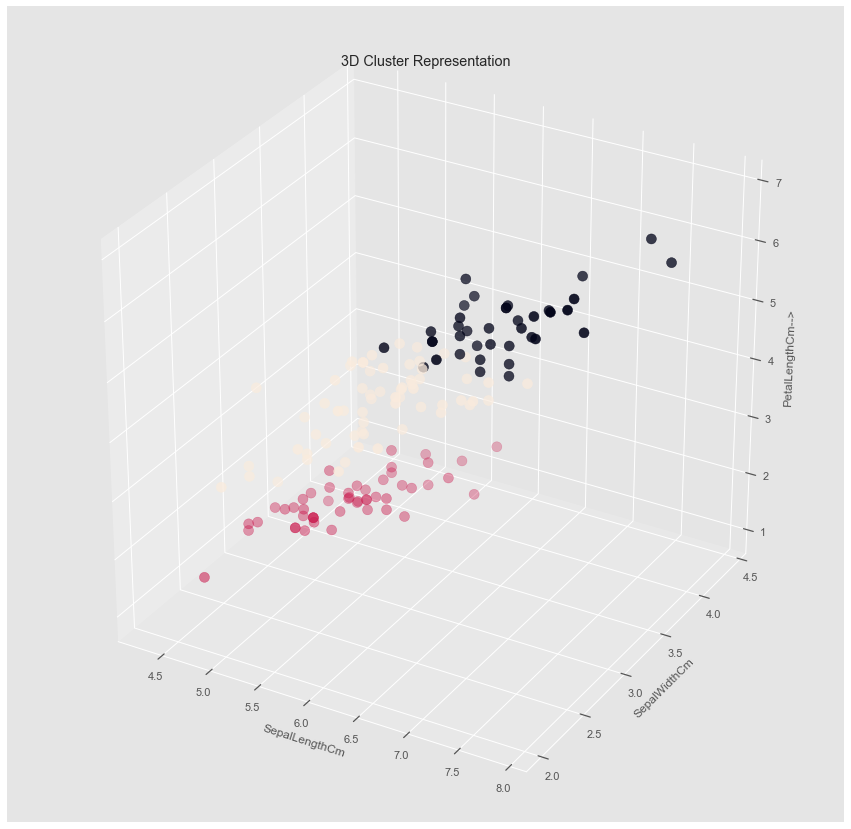

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection="3d")
x=np.array(iris["SepalLengthCm"])
y=np.array(iris["SepalWidthCm"])
z=np.array(iris["PetalLengthCm"])
ax.scatter(x,y,z, c=iris["cluster"],s=100)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm-->")
plt.title("3D Cluster Representation")
plt.show()